## CS/Stat/Data 118 - Fall 2021
## Lecture 15 - Fuzzy Matching


### Often times different strings can refer to the same real-world entities
* This can happen due to typos
* Or sometimes we just have multiple ways of referring to the same thing - e.g., “Dave” vs. “David”
    * Of course, sometimes identical strings refer to different real-world entities (need more information in this case)
    
    
* This comes up when “deduplicating” data (“dedup”)
* Also an issue when combining data from different data sets

### We’ll look at ways of measuring string similarity


### Challenges

#### Accuracy: Matching strings often appear quite differently
* Typing and OCR errors: David Smith vs. Davod Smith
* Different formatting conventions: 10/8 vs. Oct 8
* Custom abbreviation, shortening, or omission: Daniel Walker Herbert Smith vs. Daniel W.H.Smith
* Different names, nick names: William Smith vs. Bill Smith
* Shuffling parts of strings: Dept. of Computer Science, UChicago vs. Computer Science Dept., UChicago

#### Scalability: Checking all pairs can be infeasible with “Big Data” (n^2 problem)
* We’ll talk about these types of problems next quarter!!!


### String Similarity Measures

### s(x,y)

* The higher s(x,y), the more likely that x and y match
* Declare x and y to match if s(x,y) ≥ some threshold “t”   


### Question: what are some approaches to measuring string similarity????
* What are some of the features of strings you can use?
* How to turn them into a metric?

   ## Jaccard Distance - A Set-Based Measure ##

### Set-Based Measures ###
* View strings as sets or **multi-sets** (or **bags**) of tokens
    * Q: What's the difference between a "set" and a "multi-set"?
* Use set-related properties to compute similarity scores

#### Common methods to generate tokens ####
* **words** delimited by space
    * possibly **stem** the words (i.e, remove -ing, -ed, etc.)
    * remove common **stop words** (e.g., the, and, of)
    * e.g., given “david smith”generate tokens “david” and “smith”
<p>

</p> 
  
* **q-grams**, substrings of length q
    * e.g., for “david smith” the set of 3-grams are {##d, #da, dav, avi, …, h##}
    * special characters (in this case, "#") are added to handle the start and end of string

In [1]:
#A Function to break a string into bigrams (two-character tokens)
#we'll pad the string with a special character on the front and end
#NOTE: This uses a bit of Python magic called a "List Comprehension"
#we could also do it with a normal for loop and append as we have done in the past

def bi_gram(str):
    str = '#' + str + '#'
    return([str[i:i+2] for i in range(len(str)-1)])

In [2]:
bi_gram('Dan Nicolae')

['#D', 'Da', 'an', 'n ', ' N', 'Ni', 'ic', 'co', 'ol', 'la', 'ae', 'e#']

### Measuring String Overlap ### 
<br>
<div>
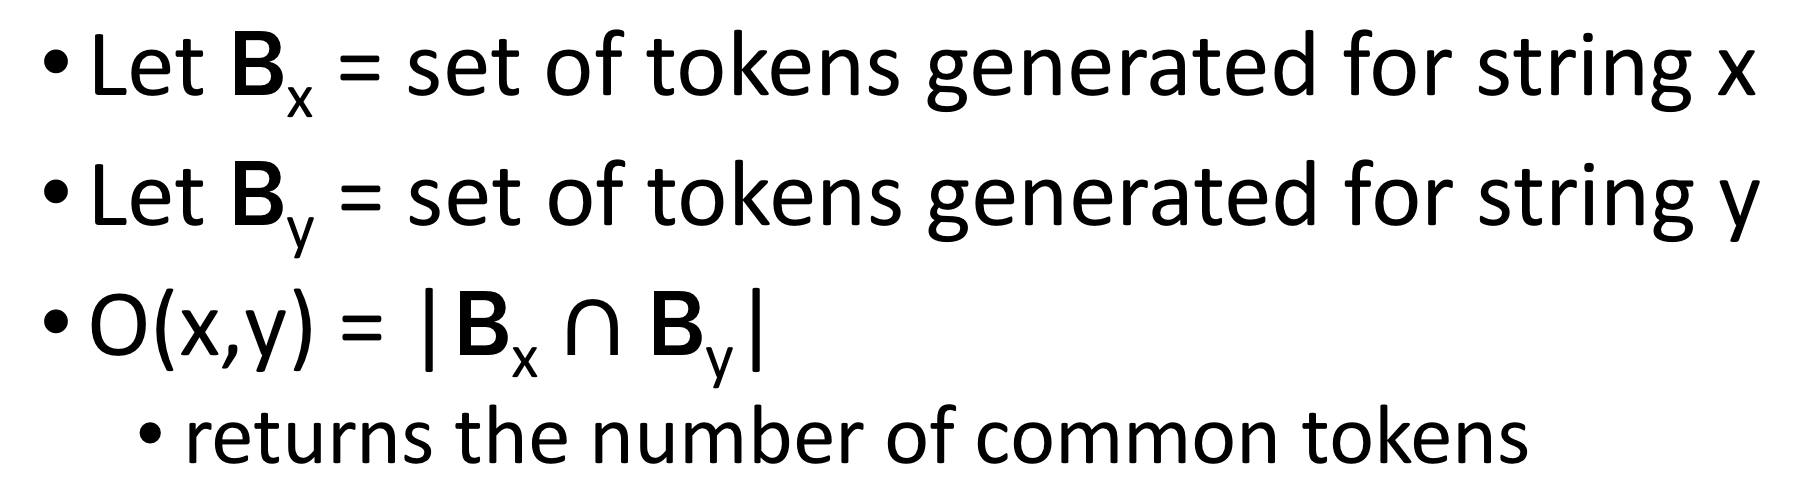
</div>


<br> 



In [3]:
# We are using set semantics when computing overlap
def overlap(str1, str2,verbose=False): 
    set1 = set(bi_gram(str1)) 
    set2 = set(bi_gram(str2))
    common_tokens = set1.intersection(set2)
    if verbose:
        print('set1 =',set1)
        print('set2 =',set2)
        print('Intersection =',common_tokens)
    return(len(common_tokens))
    

In [4]:
overlap('fff','ff',True)

set1 = {'f#', 'ff', '#f'}
set2 = {'f#', 'ff', '#f'}
Intersection = {'f#', 'ff', '#f'}


3

<div>
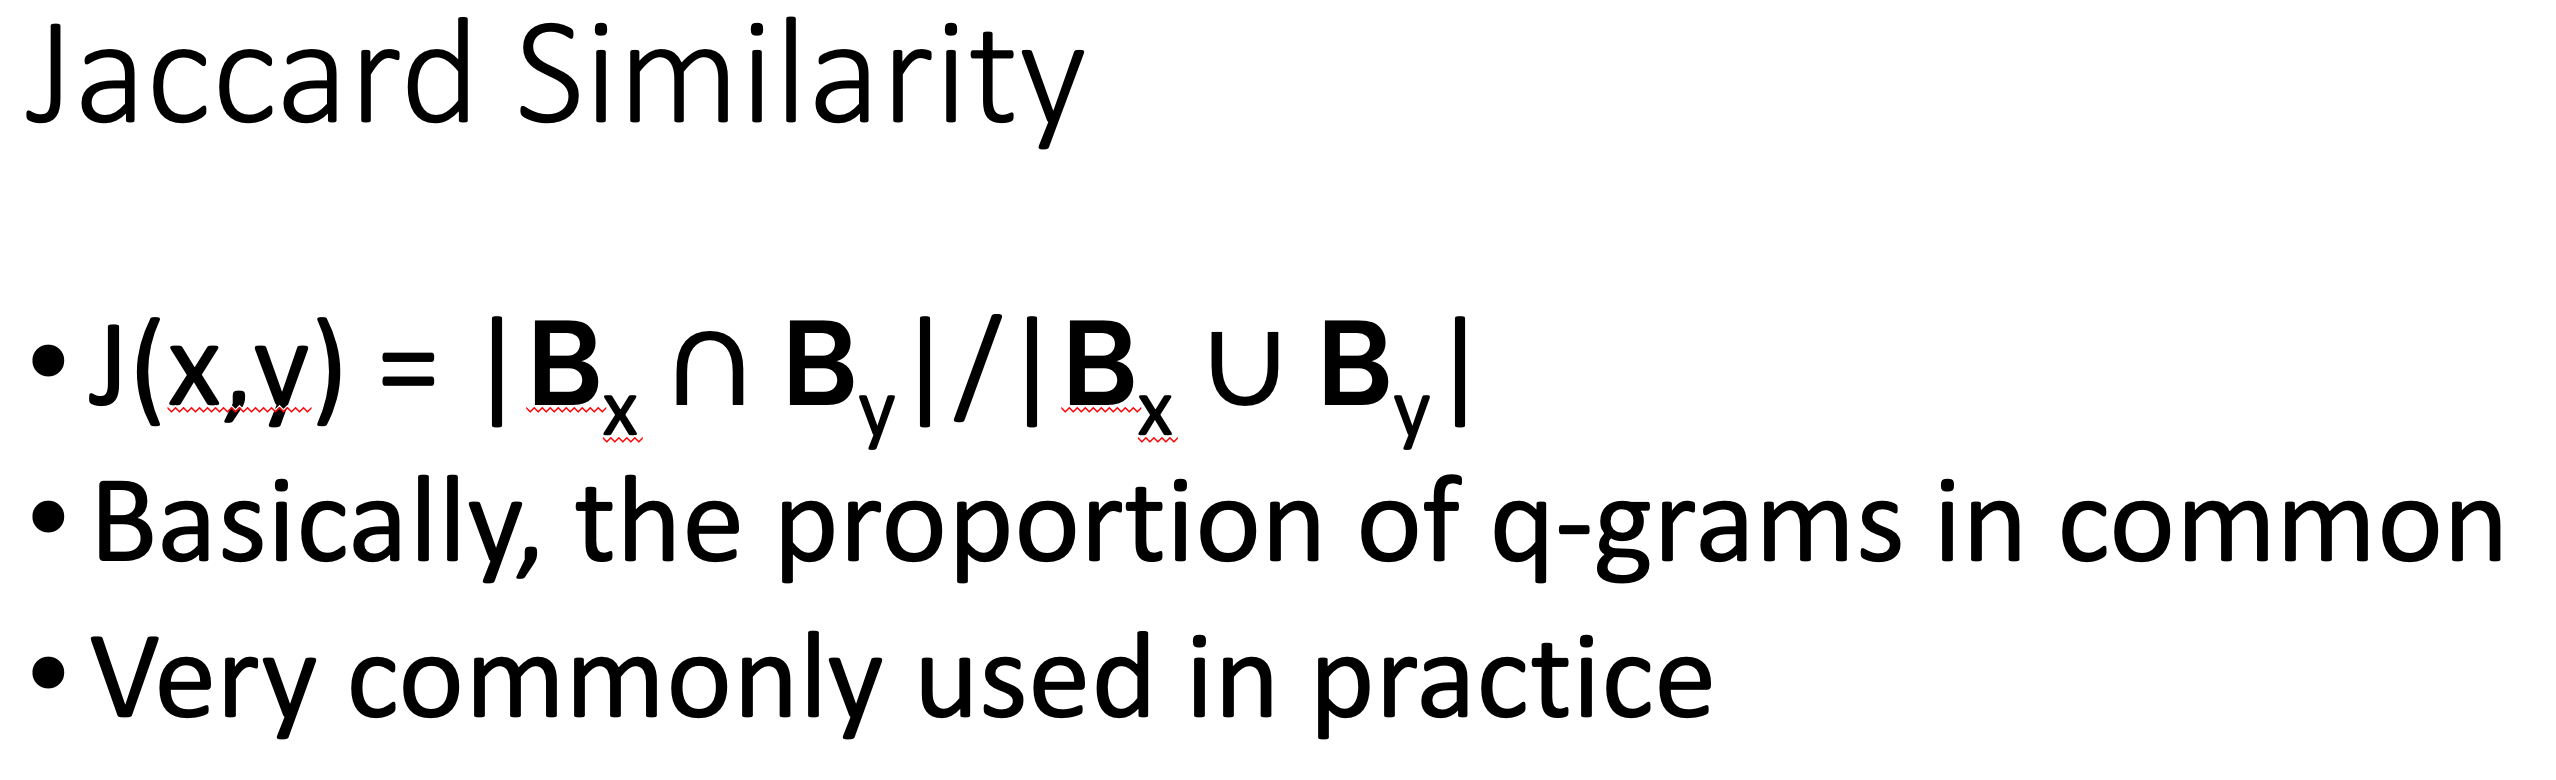
</div>


<br> 


In [5]:
#compute the jaccard similarity of two strings using bigrams
#call jaccard_sim(string1,string2,True) to see intermediate values
#call jaccard_sim(string1,sring2) or jaccard_sim(string1,string2,False) to just get the answer
def jaccard_sim(str1, str2,verbose=False): 
    set1 = set(bi_gram(str1)) 
    set2 = set(bi_gram(str2))
    common_tokens = set1.intersection(set2)
    all_tokens = set1.union(set2)
    if verbose:
        print('set1 =',set1)
        print('set2 =',set2)
        print('Intersection =',common_tokens)
        print('Union =',all_tokens)
        print('Common Tokens =',len(common_tokens),
              'Total Tokens =',len(all_tokens))
    return float(len(common_tokens) / len(all_tokens))

In [6]:
jaccard_sim('the quick brown fox','fox quick brown the')

0.6666666666666666

In [7]:
#what's going on here?
jaccard_sim('the quick brown fox','fox quick brown the',True)

set1 = {'fo', 'ox', 'e ', 'br', 'ow', ' b', 'x#', ' q', '#t', 'ck', 'k ', 'ro', 'wn', 'n ', 'th', 'ui', 'ic', 'qu', ' f', 'he'}
set2 = {'fo', ' t', 'ox', 'br', 'ow', ' b', ' q', 'ck', 'k ', 'e#', 'ro', 'wn', 'n ', 'x ', 'th', 'ui', 'ic', 'qu', 'he', '#f'}
Intersection = {'ic', 'wn', 'n ', ' q', 'ck', 'fo', 'k ', 'qu', 'ox', 'ro', 'th', 'he', 'ui', ' b', 'br', 'ow'}
Union = {'fo', ' t', 'ox', 'e ', 'br', 'ow', ' b', 'x#', ' q', '#t', 'ck', 'k ', 'e#', 'ro', 'wn', 'n ', 'x ', 'th', 'ui', 'ic', 'qu', ' f', 'he', '#f'}
Common Tokens = 16 Total Tokens = 24


0.6666666666666666

In [8]:
jaccard_sim('dave','dav',True)

set1 = {'da', 'e#', 've', '#d', 'av'}
set2 = {'da', 'av', '#d', 'v#'}
Intersection = {'da', '#d', 'av'}
Union = {'da', 'e#', 've', '#d', 'av', 'v#'}
Common Tokens = 3 Total Tokens = 6


0.5

In [9]:
jaccard_sim('Franklyn','Franklin')

0.6363636363636364

In [10]:
jaccard_sim('M.J. Franklin','Franklin, M.J.')

0.5263157894736842

In [11]:
jaccard_sim('Michael Franklin','Dan Nicolae')

0.11538461538461539

In [12]:
#How good is it with reversed strings?  Not very.
jaccard_sim('0123456789','9876543210',True)

set1 = {'9#', '34', '01', '23', '78', '56', '12', '67', '89', '45', '#0'}
set2 = {'98', '76', '21', '#9', '87', '43', '54', '10', '0#', '32', '65'}
Intersection = set()
Union = {'9#', '98', '76', '01', '21', '67', '89', '0#', '32', '34', '23', '78', '56', '#9', '87', '43', '54', '12', '10', '65', '45', '#0'}
Common Tokens = 0 Total Tokens = 22


0.0

### To use it as a similarity function, you have to pick a threshold ###

In [13]:
def sim(str1,str2):
  threshold = 0.5
  return (jaccard_sim(str1,str2) >= threshold)

In [14]:
sim('dave','dav')

True

In [15]:
sim('M.J. Franklin','Franklin M.J.')

True

In [16]:
sim('Mike','Dan')

False

### Set-based metrics (like Jaccard) ignore the overall structure of the strings (tokens are treated as a set or multiset).   Other metrics consider the strings as sequences.  "Edit Distance" (a.k.a "Levenshtein Distance") is one such metric. ###

d(x,y) is the minimal cost of transforming string x into string y using a sequence of operations, each with cost 1

* The operations are:
  * Delete a character
  * Insert a character
  * Substitute a character at a position with a different character

  
* An algorithm for finding the minimal number of edits using "dynamic programming" uses a number of steps equal to the product of the length of the strings.


<div>
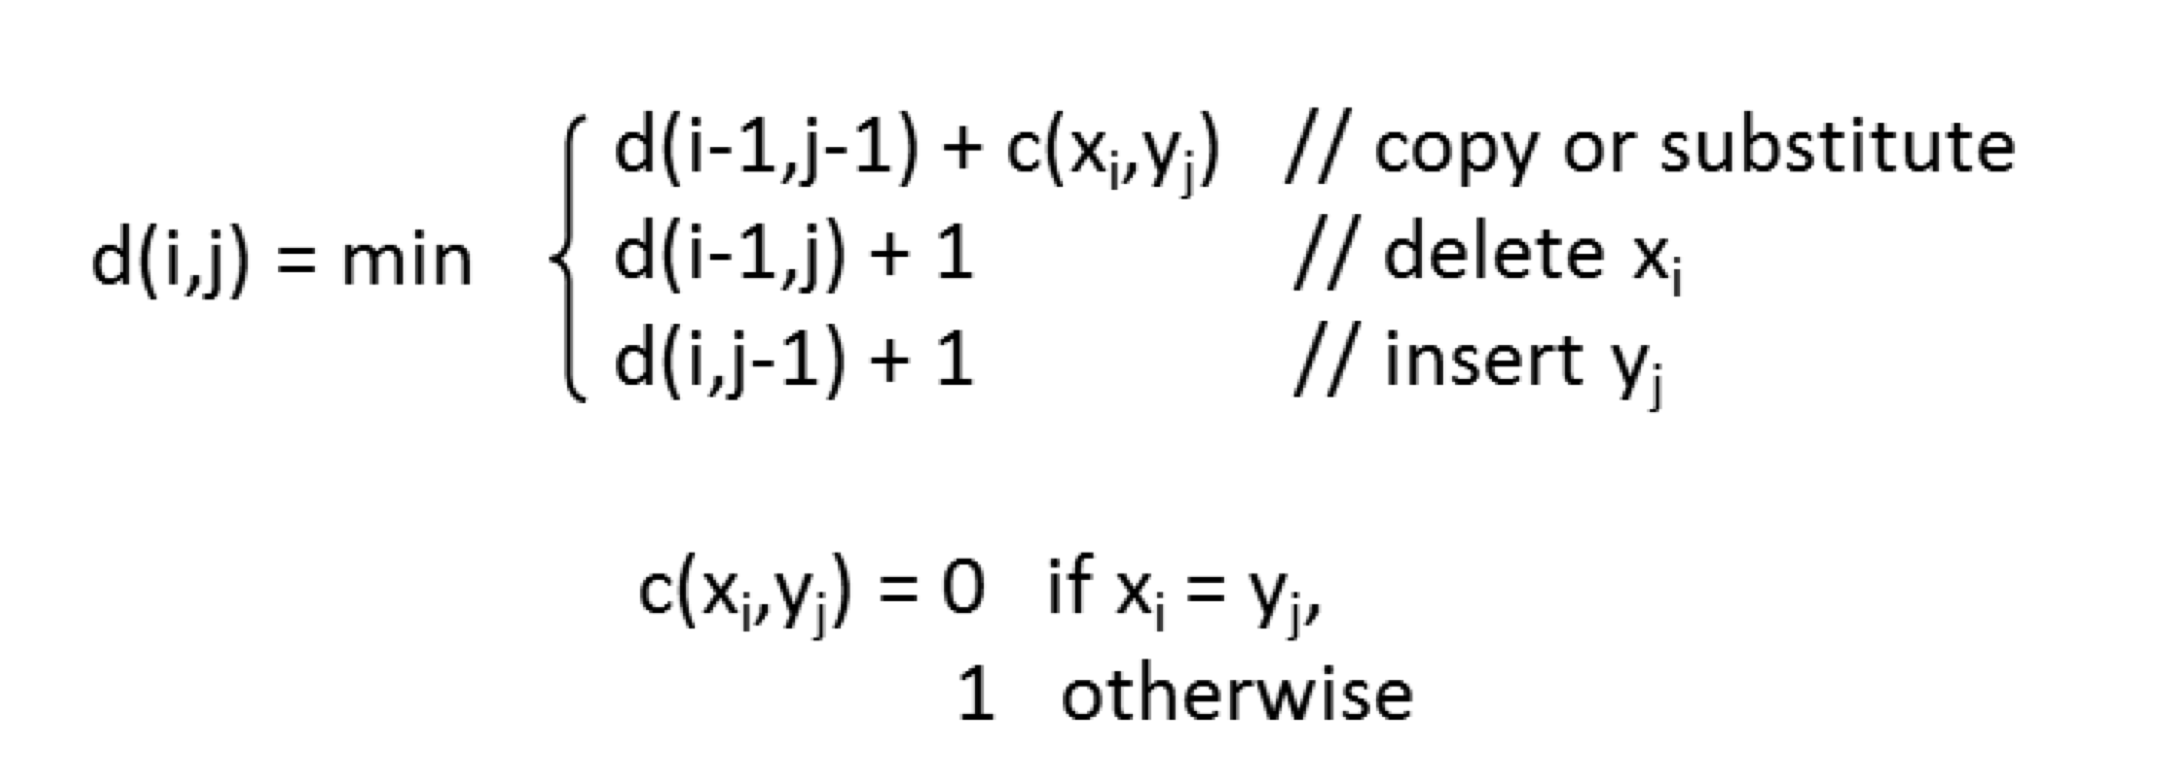
</div>


<br> 


  
  
* For example, x = David Smiths, y = Davidd Simth
  * Insert "d" after "d"
  * Substitute "m" with "i"
  * Substitute (original)"i" with "m"
  * Delete the last character of x (that's the small "s")
  * so d(x,y) = 4
  

### Given the edit distance, we can turn it into a similarity measure by normalizing the number of edit operations by the length of the longest string. 

* s(x,y) = 1 - (d(x,y) / max(len(x),len(y)))

### Q: What would be a justification for using edit distance rather than Jaccard?  (hint: what is edit distance capturing?)

## Levenshtein Similarity Measure using Edit Distance from a library ##

### Note: to use this library you'll need to first install it using the following command from the command line and then restart the notebook:###
`pip install python-levenshtein`


In [17]:
import Levenshtein

In [18]:
#lev: Function to compute the Levenshtein Ratio
#d(x,y) is the minimum number of edits to go from x to y
#
#s(x,y) = 1 - d(x,y) / [max(length(x), length(y))]
#call lev(string1,string2,True) to see intermediate values
#call lev(string1,string2) or (string1,string2,False) to just get the answer

def lev(str1,str2,verbose=False):
    maxlen = max([len(str1),len(str2)])
    if verbose:
        print('distance =',(Levenshtein.distance(str1,str2)))
        print('maxlen =',maxlen)
        print('edit operations =', Levenshtein.editops(str1,str2))
    return (1 - (Levenshtein.distance(str1,str2))/ maxlen)

In [19]:
lev('plein air','pilsen air')

0.7

In [20]:
lev('dave','dav',True)

distance = 1
maxlen = 4
edit operations = [('delete', 3, 3)]


0.75

In [21]:
lev('University of Chicago','University of Chigogo',False)

0.9047619047619048

In [22]:
lev('University of Chicago','University of Chigogo',True)

distance = 2
maxlen = 21
edit operations = [('replace', 17, 17), ('replace', 18, 18)]


0.9047619047619048

In [23]:
#Function to compare Jaccard and Lev
def compare_metrics(str1,str2,verbose=False):
    j = jaccard_sim(str1,str2,verbose)
    l = lev(str1,str2,verbose)
    print('Jaccard = ', j,' Levenshtein = ', l)

In [24]:
compare_metrics('dave','dav')

Jaccard =  0.5  Levenshtein =  0.75


In [25]:
#Here's a case where Levenshtein seems to do pretty well
compare_metrics('University of Chicago','University of Chigogo')

Jaccard =  0.7916666666666666  Levenshtein =  0.9047619047619048


In [26]:
#Here's a case where Jaccard seems to do pretty well
compare_metrics('reallylongword1 anotherwordwhichisreallylong',
    'anotherwordwhichisreallylong reallylongword1')

Jaccard =  0.7777777777777778  Levenshtein =  0.2727272727272727


In [27]:
compare_metrics('1 2 3 4 5','5 4 3 2 1')

Jaccard =  0.42857142857142855  Levenshtein =  0.5555555555555556


In [28]:
#neither handles reversed strings
compare_metrics('0123456789','9876543210')

Jaccard =  0.0  Levenshtein =  0.0


In [29]:
#with an odd number of characters...
compare_metrics('012345678','876543210',False)

Jaccard =  0.0  Levenshtein =  0.11111111111111116


In [30]:
#with odd number of characters lev doesn't have to change the middle one
compare_metrics('012345678','876543210',True)

set1 = {'34', '01', '23', '8#', '78', '56', '12', '67', '45', '#0'}
set2 = {'76', '21', '87', '43', '54', '10', '0#', '#8', '32', '65'}
Intersection = set()
Union = {'76', '01', '8#', '21', '67', '0#', '32', '34', '23', '78', '56', '87', '43', '65', '54', '12', '10', '#8', '45', '#0'}
Common Tokens = 0 Total Tokens = 20
distance = 8
maxlen = 9
edit operations = [('replace', 0, 0), ('replace', 1, 1), ('replace', 2, 2), ('replace', 3, 3), ('replace', 5, 5), ('replace', 6, 6), ('replace', 7, 7), ('replace', 8, 8)]
Jaccard =  0.0  Levenshtein =  0.11111111111111116


In [31]:
compare_metrics('a man a plan a canal, panama','o man o plon o conol, ponomo')

Jaccard =  0.2903225806451613  Levenshtein =  0.6785714285714286


### Here's a crazy idea, why don't we try to compare strings based on how they sound???  ###

* "Soundex" was developed by Robert C. Russell and Margaret King Odell  and patented in 1918 for use with surnames in the US census.

* Question 1 - how do you do this????
* Question 2 - what would be the justification for doing this?

In [32]:
def get_soundex(name):
  """Get the soundex code for the string"""
  name = name.upper()
    
  soundex = ""
  soundex += name[0]

  dictionary = {"BFPV": "1", "CGJKQSXZ":"2", "DT":"3",
                "L":"4", "MN":"5", "R":"6", "AEIOUHWY":"."}

  for char in name[1:]:
    for key in dictionary.keys():
      if char in key:
        code = dictionary[key]
        #don't keep sequential duplicates
        if code != soundex[-1]:
          soundex += code
        
  #remove any dots
  soundex = soundex.replace(".", "")
  #pad with zeros if needed
  soundex = soundex[:4].ljust(4, "0")

  return soundex

In [33]:
get_soundex('Franklin')

'F652'

In [34]:
get_soundex('Franklyn')

'F652'

In [35]:
get_soundex('Nicolae')

'N240'